In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from functools import reduce
import seaborn as sns

In [16]:
drive.mount('/content/drive/')
gdp_pc = pd.read_csv('/content/drive/My Drive/DAT565/Data/gdp-per-capita-penn-world-table.csv')
life_exp = pd.read_csv('/content/drive/My Drive/DAT565/Data/life-expectancy.csv')
gdp = pd.read_csv('/content/drive/My Drive/DAT565/Data/national-gdp-penn-world-table.csv')

gdp_pc_2019 = gdp_pc[gdp_pc['Year'] == 2019]
life_exp_2019 = life_exp[life_exp['Year'] == 2019]
gdp = gdp[gdp["Year"] == 2019]

gdp_pc_2019.rename(columns={'GDP per capita (output, multiple price benchmarks)':'GDP_PC'},inplace=True)
life_exp_2019.rename(columns={'Life expectancy at birth (historical)':'life_exp'},inplace=True)
gdp.rename(columns={'LOCATION': 'Code', 'TIME': 'Year', 'GDP (output, multiple price benchmarks)':'GDP'}, inplace=True)

dataframes = [gdp_pc_2019, life_exp_2019, gdp]
df = reduce(lambda  left,right: pd.merge(left,right,on=['Year', 'Entity', 'Code'],
                                            how='outer'), dataframes)

df.dropna(subset=['GDP_PC', 'life_exp', 'GDP'], inplace=True)
gdp.dropna()

# df['GDP'] = df['GDP']/1000000
df['GDP'] = round(df["GDP"], 2)
df['GDP_PC'] = round(df["GDP_PC"], 2)

display(df)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<ipython-input-16-8a1323cbe38a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pc_2019.rename(columns={'GDP per capita (output, multiple price benchmarks)':'GDP_PC'},inplace=True)
<ipython-input-16-8a1323cbe38a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_exp_2019.rename(columns={'Life expectancy at birth (historical)':'life_exp'},inplace=True)


,Entity,Code,Year,GDP_PC,life_exp,GDP
0,Albania,ALB,2019,12531.79,79.3,3.610304e+10
1,Algeria,DZA,2019,11787.49,76.5,5.074876e+11
2,Angola,AGO,2019,7159.58,62.4,2.278557e+11
3,Anguilla,AIA,2019,15177.92,76.9,2.256805e+08
4,Antigua and Barbuda,ATG,2019,16514.49,78.7,1.603854e+09
...,...,...,...,...,...,...
178,Venezuela,VEN,2019,251.09,72.2,7.160107e+09
179,Vietnam,VNM,2019,7506.82,74.1,7.241234e+11
180,Yemen,YEM,2019,1777.25,65.1,5.182806e+10
181,Zambia,ZMB,2019,3179.20,62.8,5.678372e+10


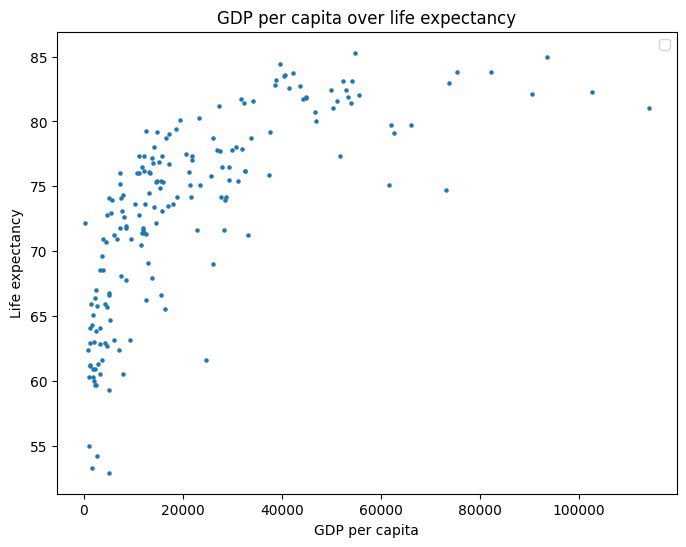

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP_PC'], df['life_exp'], s=5)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('GDP per capita over life expectancy')
plt.legend()

In [18]:
GDP_PC_mean = df['GDP_PC'].mean()
life_exp_mean = df['life_exp'].mean()
GDP_PC_std = df['GDP_PC'].std()
life_exp_std = df['life_exp'].std()

life_exp_high = df[df["life_exp"] > life_exp_mean+life_exp_std]

prc_high = life_exp_high['Entity'].nunique() / df['Entity'].nunique()
print(life_exp_high['Entity'].nunique())
print(df['Entity'].nunique())
print(f"{prc_high*100:.1f} %" )
list_1 = life_exp_high['Entity'].unique().tolist()
list_1

33
183
18.0 %


['Australia',
 'Austria',
 'Belgium',
 'Bermuda',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Luxembourg',
 'Macao',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'United Kingdom']

In [19]:
GDP_mean = df['GDP'].mean()
GDP_std = df['GDP'].std()

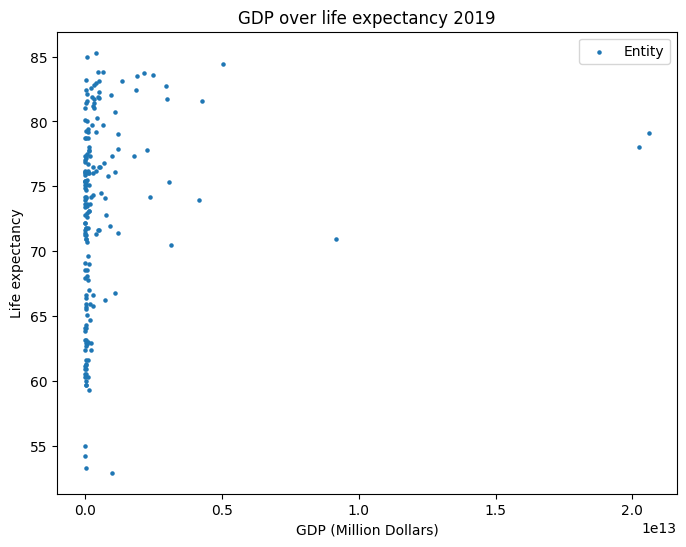

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP'], df['life_exp'], label='Entity', s=5)
plt.xlabel('GDP (Million Dollars)')
plt.ylabel('Life expectancy')
plt.title('GDP over life expectancy 2019')
plt.legend()

Since there are very few countries with a very high GDP, I wanted to take a closer look at all the countries  except the three with GDP > 1x10^13 USD. Thus, below you find a new graph with all countries except the three with very high GDP.

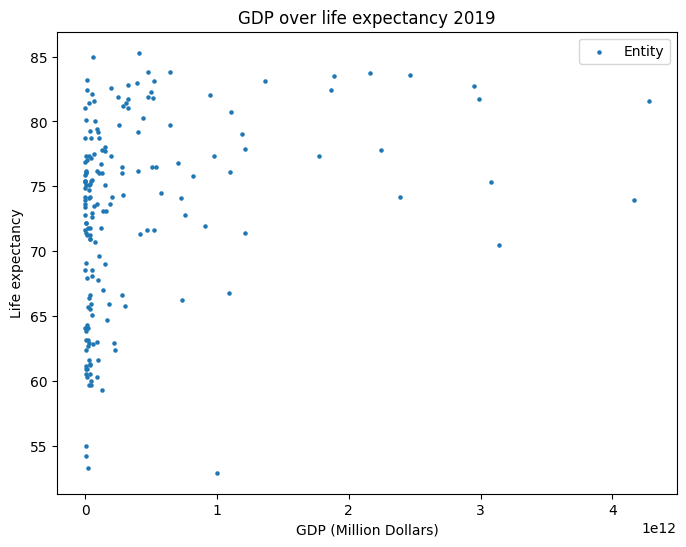

In [21]:
df2 = df[df['GDP'] < 0.5e13]

plt.figure(figsize=(8, 6))
plt.scatter(df2['GDP'], df2['life_exp'], label='Entity', s=5)
plt.xlabel('GDP (Million Dollars)')
plt.ylabel('Life expectancy')
plt.title('GDP over life expectancy 2019')
plt.legend()

This graph does not show any signficant relation which was not shown in the previous graph.

In [22]:
GDP_Median = np.median(df['GDP'])

hLife_lGDP = df[(df["life_exp"] > life_exp_mean + life_exp_std) & (df["GDP"] < (GDP_Median/2))]

display(hLife_lGDP)

,Entity,Code,Year,GDP_PC,life_exp,GDP
19,Bermuda,BMU,2019,50273.47,81.0,3.142394e+09
46,Cyprus,CYP,2019,32301.82,81.4,2.805397e+10
78,Iceland,ISL,2019,53011.74,82.4,1.797262e+10
106,Malta,MLT,2019,38910.08,83.2,1.713491e+10


In [23]:
GDP_PC_mean

22032.03590163934

In [24]:
top10_gdp = df.sort_values(by='GDP', ascending=False).head(10)
display(top10_gdp)
display(f'Life expectancy mean {life_exp_mean:.2f}')

,Entity,Code,Year,GDP_PC,life_exp,GDP
175,United States,USA,2019,62589.00,79.1,2.059584e+13
38,China,CHN,2019,14128.81,78.0,2.025766e+13
79,India,IND,2019,6711.38,70.9,9.170555e+12
87,Japan,JPN,2019,39704.23,84.4,5.036891e+12
66,Germany,DEU,2019,51190.89,81.6,4.275312e+12
137,Russia,RUS,2019,28526.29,73.9,4.161194e+12
80,Indonesia,IDN,2019,11595.10,70.5,3.137931e+12
24,Brazil,BRA,2019,14593.96,75.3,3.080049e+12
174,United Kingdom,GBR,2019,44274.96,81.7,2.989896e+12
62,France,FRA,2019,43755.06,82.7,2.946958e+12


'Life expectancy mean 73.09'

In [25]:
GDP_PC_Median = np.median(df['GDP_PC'])
GDP_PC_mean = np.mean(df['GDP_PC'])
display(GDP_PC_Median)
display(GDP_PC_mean)

hLife_lGDP_PC = df[(df["life_exp"] > life_exp_mean + life_exp_std/1.5) & (df["GDP_PC"] < (GDP_PC_mean))]

display(hLife_lGDP_PC)

14480.71

22032.03590163934

,Entity,Code,Year,GDP_PC,life_exp,GDP
0,Albania,ALB,2019,12531.79,79.3,3.610304e+10
4,Antigua and Barbuda,ATG,2019,16514.49,78.7,1.603854e+09
42,Costa Rica,CRI,2019,18522.18,79.4,9.349183e+10
95,Lebanon,LBN,2019,14749.87,79.2,1.011208e+11
104,Maldives,MDV,2019,19411.28,80.1,1.030648e+10
164,Thailand,THA,2019,17116.31,79.0,1.191733e+12


In [26]:
top10_gdp_pc = df.sort_values(by='GDP_PC', ascending=False).head(10)
display(top10_gdp_pc)
display(f'Life expectancy mean {life_exp_mean}')

,Entity,Code,Year,GDP_PC,life_exp,GDP
135,Qatar,QAT,2019,114100.81,81.0,3.231411e+11
83,Ireland,IRL,2019,102622.45,82.3,5.010536e+11
100,Macao,MAC,2019,93488.38,85.0,5.987416e+10
99,Luxembourg,LUX,2019,90479.41,82.1,5.571079e+10
148,Singapore,SGP,2019,82336.34,83.8,4.779079e+11
159,Switzerland,CHE,2019,75298.82,83.8,6.469196e+11
125,Norway,NOR,2019,73668.79,83.0,3.962539e+11
26,Brunei,BRN,2019,73249.19,74.7,3.173777e+10
173,United Arab Emirates,ARE,2019,66112.72,79.7,6.459562e+11
175,United States,USA,2019,62589.00,79.1,2.059584e+13


'Life expectancy mean 73.08797814207651'